1. Importing packages

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

%matplotlib inline


2. Create a scraping function

In [2]:
def scrape_func(url):
    headers = {"User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0"}
    raw_data = {}
    headers = []
    soup = BeautifulSoup(requests.get(url, headers=headers).content, "html.parser")
    #print(soup)
    
    headers = [header.text for listing in soup.find_all('thead') for header in listing.find_all('th')]
    raw_data = {header: [] for header in headers}
    #print(raw_data)
    
    for rows in soup.find_all('tbody'):
        #print(rows)
        for row in rows.find_all('tr'):
            #print(row)
            #if len(row) != len(headers) or row.find_all('td')[3].text == '-':continue
            if len(row) != len(headers):continue
            for idx, cell in enumerate(row.find_all('td')):
                #print(idx)
                raw_data[headers[idx]].append(cell.text)
    
    return pd.DataFrame(raw_data)


def convert_into_float(df, columns):
    for column in columns: 
        df[column] = pd.to_numeric(df[column].str.replace(',',''))
    return df

3. Lets scrape our target website by passing url to our scrape_func
url: https://www.nfl.com/stats/team-stats/defense/passing/2022/reg/all
Get Team Names, Pass Attempt and Pass Completed stats

In [3]:
scraped = scrape_func('https://www.nfl.com/stats/team-stats/defense/passing/2022/reg/all')

In [4]:
scraped

,Team,Att,Cmp,Cmp %,Yds/Att,Yds,TD,INT,1st,1st%,Sck
0,BuccaneersBuccaneers,395,253,64,5.9,2344,18,7,129,32.7,38
1,ChargersChargers,379,241,63.6,7,2641,20,9,141,37.2,22
2,ColtsColts,387,264,68.2,6.3,2452,16,5,128,33.1,32
3,CardinalsCardinals,438,303,69.2,6.7,2945,24,7,161,36.8,23
4,ChiefsChiefs,432,294,68.1,6.6,2847,24,6,156,36.1,36
5,VikingsVikings,449,302,67.3,7.6,3403,16,12,161,35.9,30
6,BillsBills,425,273,64.2,6.2,2620,15,13,140,32.9,31
7,RaidersRaiders,459,320,69.7,7.2,3308,21,4,163,35.5,25
8,BengalsBengals,395,233,59,6.6,2588,11,8,122,30.9,19
9,CommandersCommanders,404,249,61.6,6.4,2601,20,7,126,31.2,34


4. Data type conversion and making ready before plotting

In [5]:
scraped = convert_into_float(scraped, scraped.columns[1:])
Team = scraped['Team'].values.tolist()
Attempt = scraped['Att'].values.tolist()
Complete = scraped['Cmp'].values.tolist()

index = []

for item in Team:
    z=len(item)
    x = int(z/2)
    #print(item[:x])
    index.append(item[:x])

5. Plotting

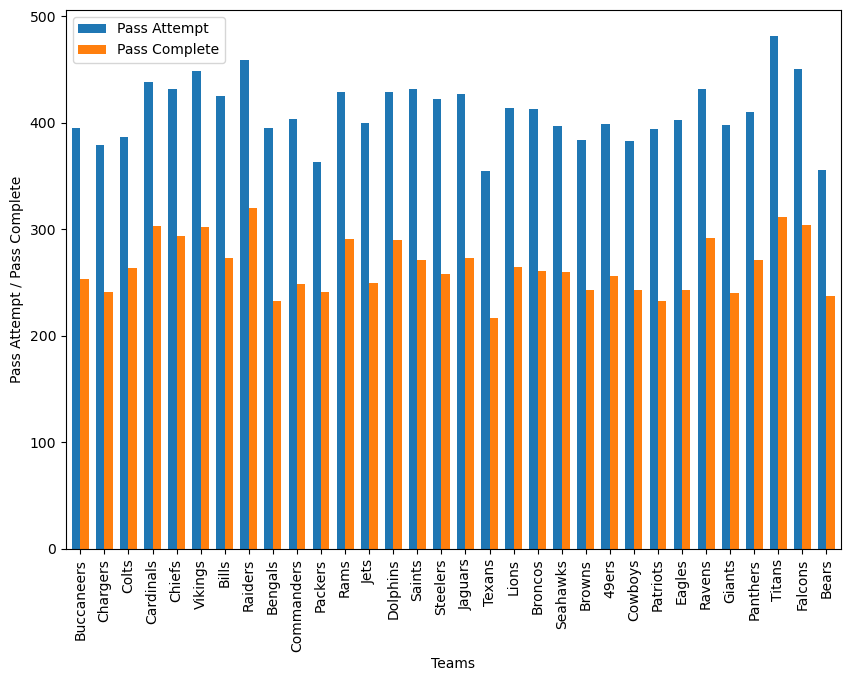

In [6]:
plt.rcParams["figure.figsize"] = (10,7)

pl_df = pd.DataFrame({'Pass Attempt': Attempt, 'Pass Complete':Complete}, index=index)
ax = pl_df.plot(kind="bar", width=0.7)
plt.xlabel('Teams') 
plt.ylabel('Pass Attempt / Pass Complete') 
plt.show()

6. Lets scrape our target website by passing url to our scrape_func
url: https://www.nfl.com/stats/team-stats/defense/rushing/2022/reg/all
Get Team Names, Rush Attempt and Run-Rush yards gained stats

In [7]:
scraped = scrape_func('https://www.nfl.com/stats/team-stats/defense/rushing/2022/reg/all')

In [8]:
scraped

,Team,Att,Rush Yds,YPC,TD,Rush 1st,Rush 1st%
0,BearsBears,401,1902,4.7,21,109,27.2
1,FalconsFalcons,385,1684,4.4,15,108,28
2,EaglesEagles,305,1415,4.6,10,81,26.6
3,CommandersCommanders,328,1435,4.4,7,73,22.3
4,BrownsBrowns,321,1529,4.8,16,86,26.8
5,GiantsGiants,332,1693,5.1,11,90,27.1
6,CowboysCowboys,339,1557,4.6,6,83,24.5
7,RavensRavens,259,990,3.8,9,60,23.2
8,TitansTitans,265,997,3.8,5,68,25.7
9,49ers49ers,271,907,3.4,9,53,19.6


7. Data type conversion and making ready before plotting

In [9]:
scraped = convert_into_float(scraped, scraped.columns[1:])
Team = scraped['Team'].values.tolist()
Attempt = scraped['Att'].values.tolist()
RushYards = scraped['Rush Yds'].values.tolist()

index = []

for item in Team:
    z=len(item)
    x = int(z/2)
    #print(item[:x])
    index.append(item[:x])

8. Plotting

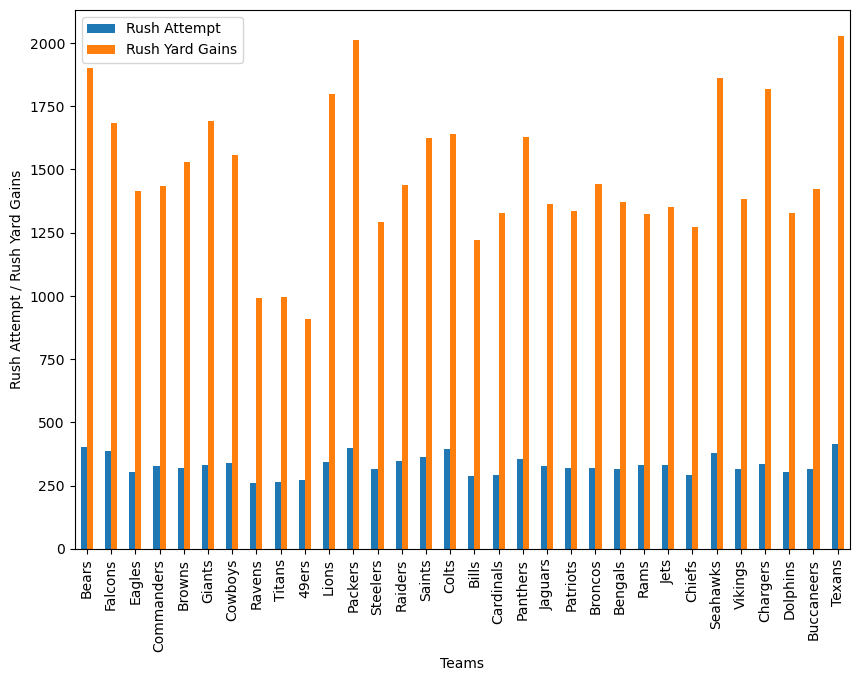

In [10]:
plt.rcParams["figure.figsize"] = (10,7)

pl_df = pd.DataFrame({'Rush Attempt': Attempt, 'Rush Yard Gains':RushYards}, index=index)
ax = pl_df.plot(kind="bar", width=0.5)

plt.xlabel('Teams') 
plt.ylabel('Rush Attempt / Rush Yard Gains') 
plt.show()